In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
arrests = pd.read_csv('Arrests.csv')
crimes = pd.read_csv('Crimes.csv')
arrests.columns=["cb_no","case_number","arrest_date","race","charge_1_statute","charge_1_description","charge_1_type","charge_1_class","charge_2_statute","charge_2_description","charge_2_type","charge_2_class","charge_3_statute","charge_3_description","charge_3_type","charge_3_class","charge_4_statute","charge_4_description","charge_4_type","charge_4_class","charges_statute","charges_description","charges_type","charges_class","boundaries_zip_codes","community_areas","zip_codes","census_tracts","wards"]
crimes.columns=["id","case_number","date","block","iucr","primary_type","description","location_description","arrest","domestic","beat","district","ward","community_area","fbi_code","x_coordinate","y_coordinate","year","updated_on","latitude","longitude","location","historical_wards_2003_2015","zip_codes","community_areas","census_tracts","wards","boundaries_zip_codes","police_districts","police_beats","wards_2023"]

arrests['arrest_date'] = pd.to_datetime(arrests['arrest_date'], format='%m/%d/%Y %I:%M:%S %p')
arrests['year'] = arrests['arrest_date'].dt.year

In [3]:
arrests.head(5)

,cb_no,case_number,arrest_date,race,charge_1_statute,charge_1_description,charge_1_type,charge_1_class,charge_2_statute,charge_2_description,...,charges_statute,charges_description,charges_type,charges_class,boundaries_zip_codes,community_areas,zip_codes,census_tracts,wards,year
0,30293871,JG486495,2023-10-31 09:07:00,BLACK,430 ILCS 66.0/10-H,FCCL FL DISCL CONCEALED FIR,M,B,NaN,NaN,...,430 ILCS 66.0/10-H | | |,FCCL FL DISCL CONCEALED FIR | | |,M | | |,B | | |,NaN,NaN,NaN,NaN,NaN,2023
1,30293867,JG486562,2023-10-31 23:45:00,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,7-24-099(B)(4),POSS CANNABIS IN PRIV VEH NOT IN SEALED CONTAINER,...,720 ILCS 570.0/402-C | 7-24-099(B)(4) | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | | |,4 | L | |,NaN,NaN,NaN,NaN,NaN,2023
2,30293859,JG483980,2023-10-31 22:00:00,BLACK,720 ILCS 5.0/21-2-A,CRIM TRES TO VEH/PHY CONTROL,M,A,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,...,720 ILCS 5.0/21-2-A | 725 ILCS 5.0/110-3 | |,CRIM TRES TO VEH/PHY CONTROL | ISSUANCE OF WAR...,M | | |,A | Z | |,NaN,NaN,NaN,NaN,NaN,2023
3,30293858,JG486446,2023-10-31 20:36:00,WHITE HISPANIC,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,NaN,NaN,...,720 ILCS 5.0/12-3-A-1 | | |,BATTERY - CAUSE BODILY HARM | | |,M | | |,A | | |,NaN,NaN,NaN,NaN,NaN,2023
4,30293857,JG486537,2023-10-31 22:42:00,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,4-64-350,CERTAIN TRANSACTIONS - PROHIBITED,...,720 ILCS 570.0/402-C | 4-64-350 | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | | |,4 | L | |,NaN,NaN,NaN,NaN,NaN,2023


In [4]:
arrests.columns

Index(['cb_no', 'case_number', 'arrest_date', 'race', 'charge_1_statute',
       'charge_1_description', 'charge_1_type', 'charge_1_class',
       'charge_2_statute', 'charge_2_description', 'charge_2_type',
       'charge_2_class', 'charge_3_statute', 'charge_3_description',
       'charge_3_type', 'charge_3_class', 'charge_4_statute',
       'charge_4_description', 'charge_4_type', 'charge_4_class',
       'charges_statute', 'charges_description', 'charges_type',
       'charges_class', 'boundaries_zip_codes', 'community_areas', 'zip_codes',
       'census_tracts', 'wards', 'year'],
      dtype='object')

In [5]:
crimes.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'historical_wards_2003_2015', 'zip_codes',
       'community_areas', 'census_tracts', 'wards', 'boundaries_zip_codes',
       'police_districts', 'police_beats', 'wards_2023'],
      dtype='object')

EDA 1 : Arrest trends and distributions across different racial groups over time.

The graph presents a horizontal stacked bar chart showing the distribution of arrests categorized by race for each year. The data has been consolidated such that all races except for "Black," "White Hispanic," and "White" are grouped into an "Other" category for clarity. Each horizontal bar represents a year, and the lengths of the colored segments within these bars correspond to the number of arrests for each racial category. The segments within the bars are ordered by the count of arrests in non-increasing order, meaning the race with the most arrests is placed leftmost within each bar, providing an immediate visual cue as to which race experienced the highest number of arrests in any given year. 

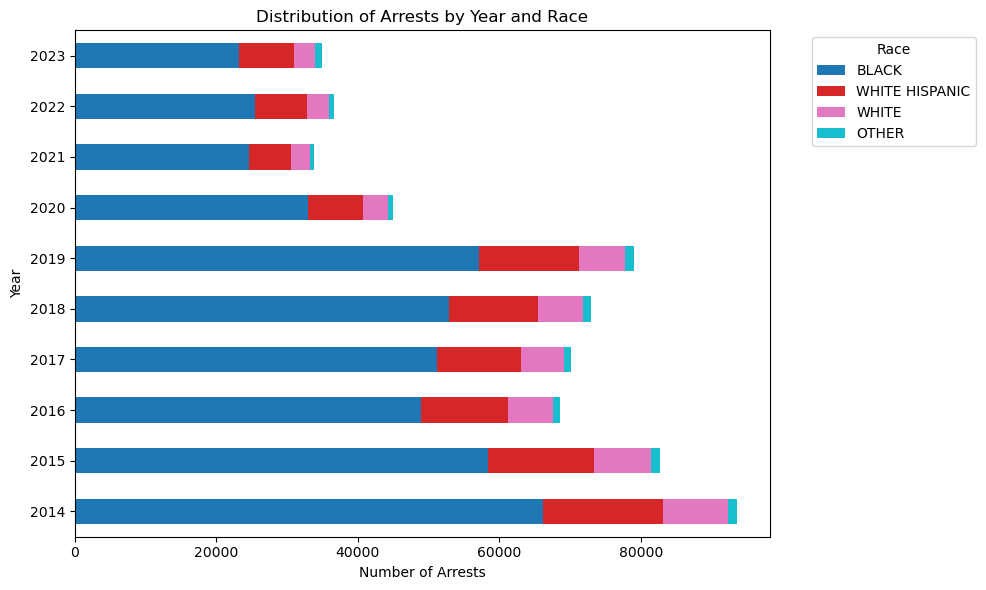

In [6]:
races_to_keep = ['BLACK', 'WHITE HISPANIC', 'WHITE']
arrests['race_updt'] = arrests['race'].where(arrests['race'].isin(races_to_keep), 'OTHER')

pivot_df = arrests.groupby(['year', 'race_updt']).size().unstack(fill_value=0)

sorted_columns = pivot_df.sum().sort_values(ascending=False).index
pivot_df = pivot_df[sorted_columns]

pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6), cmap='tab10')
plt.title('Distribution of Arrests by Year and Race')
plt.xlabel('Number of Arrests')
plt.ylabel('Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


EDA 2 : Frequencies of different arrest charge types over the years.

This line graph depicts the annual trend of felony and misdemeanor charges based on arrest records over a span of years. Each line represents one of the charge types, with felonies and misdemeanors distinctly marked.

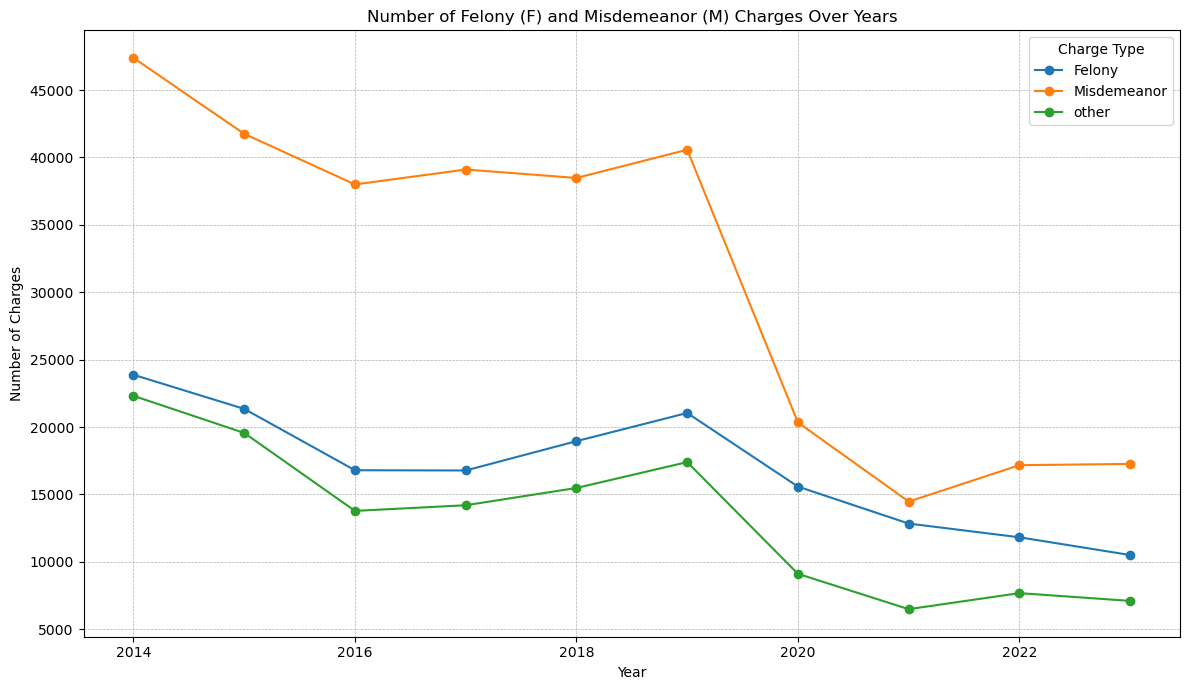

In [7]:
charges_to_keep = ['F', 'M']
arrests['charge_updt'] = arrests['charge_1_type'].where(arrests['charge_1_type'].isin(charges_to_keep), 'other')
charge_counts_by_year = arrests.groupby(['year', 'charge_updt']).size().unstack().fillna(0)
charge_counts_by_year = charge_counts_by_year.rename(columns={'F': 'Felony', 'M': 'Misdemeanor'})

charge_counts_by_year.plot(figsize=(12, 7), marker='o')
plt.title('Number of Felony (F) and Misdemeanor (M) Charges Over Years')
plt.ylabel('Number of Charges')
plt.xlabel('Year')
plt.legend(title='Charge Type')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Hypothesis 1 : Most crimes happen during the summer months. 

Exploring this hypothesis can provide insights into the underlying causes of crime. For instance, heat stress is thought to increase aggression in some individuals, or longer daylight hours might offer more opportunities for certain crimes. Such knowledge is vital for addressing the root causes of crime

This line graph illustrates the number of crimes reported each month over several years, with the overall trend denoted by a continuous line. The highest crime count in a month for an year is clearly marked by a red dot. As we can notice, most years have higher crimes during the summer months (June - September).

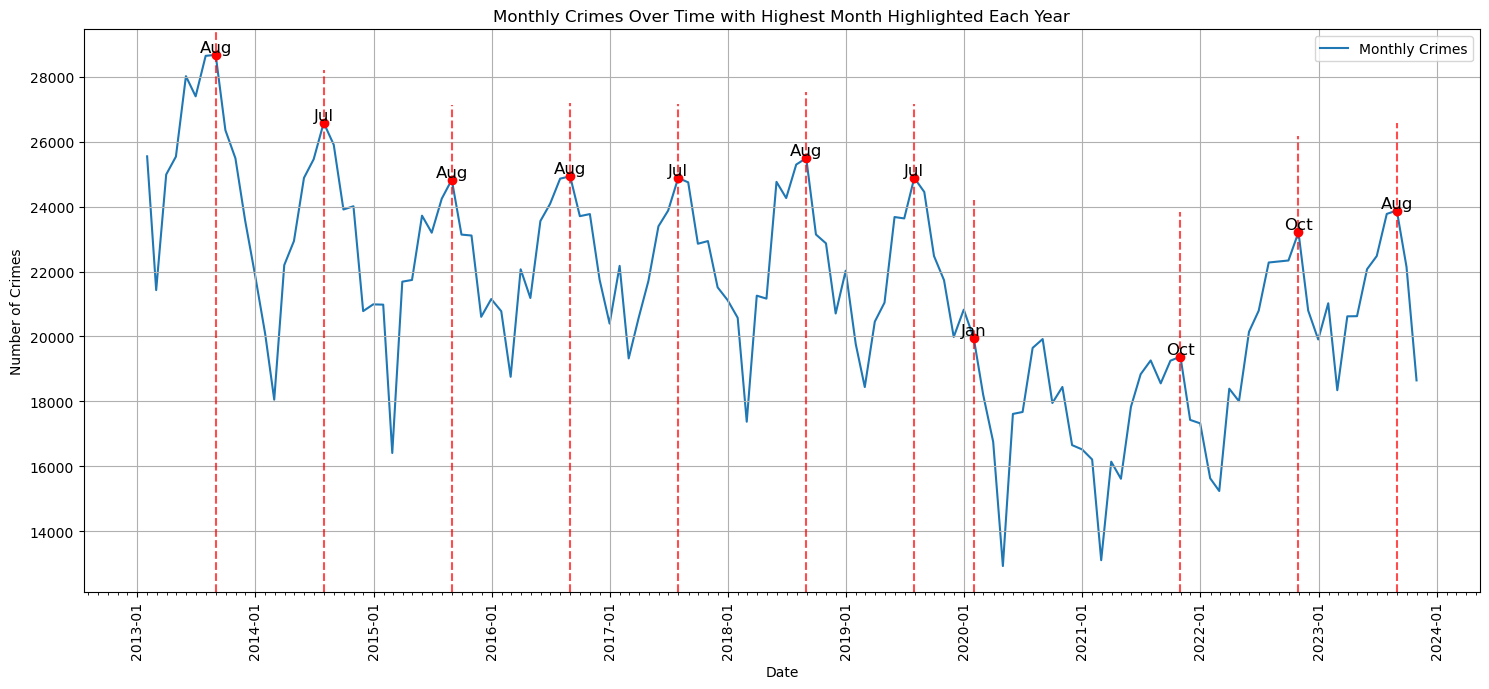

In [8]:
crimes['datef'] = pd.to_datetime(crimes['date'])
crimes.set_index('datef', inplace=True)
monthly_crimes = crimes.resample('M').size()

annual_max = monthly_crimes.resample('A').max()

max_crime_months = monthly_crimes[monthly_crimes.isin(annual_max)]

plt.figure(figsize=(15, 7))
plt.plot(monthly_crimes.index, monthly_crimes, label='Monthly Crimes', zorder=1)

for date, value in max_crime_months.items():
    plt.scatter(date, value, color='red', zorder=2)  
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7, ymin=0, ymax=(value/monthly_crimes.max()), zorder=2)
    
    plt.text(date, value, date.strftime('%b'), color='black', fontsize=12, ha='center', va='bottom')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.title('Monthly Crimes Over Time with Highest Month Highlighted Each Year')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()


Hypothesis 2 : Theft-related crimes are more frequent on weekends compared to weekdays.

Understanding when theft-related crimes are more likely to occur can help law enforcement agencies allocate resources more effectively. If there is a discernible pattern that indicates an increase in thefts over weekends, police can increase patrols or presence in high-risk areas during those times.

The bar chart compares the frequency of theft-related crimes occurring on weekdays versus weekends. It categorizes offenses such as theft, robbery, burglary, and motor vehicle theft, providing a clear visual representation of when these crimes are more likely to happen. The blue bar represents the total count of theft-related crimes reported on weekdays, while the orange bar represents the count for weekends.

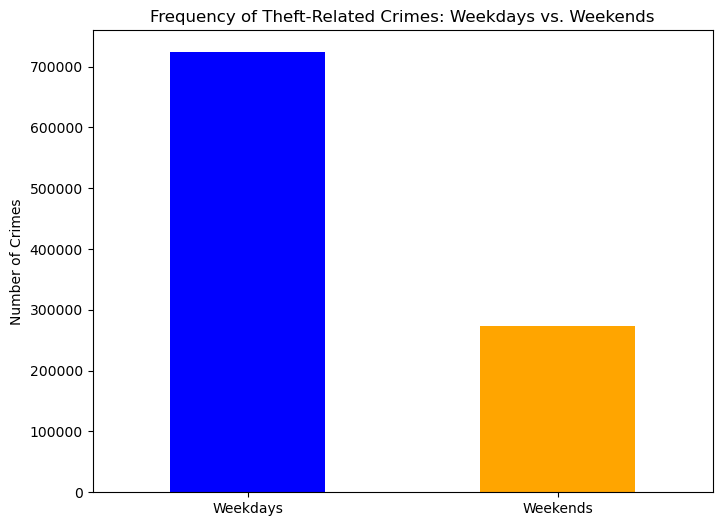

In [9]:
crimes['datef1'] = pd.to_datetime(crimes['date'], format='%m/%d/%Y %I:%M:%S %p')

crimes['day_of_week'] = crimes['datef1'].dt.dayofweek
crimes['weekend/weekday'] = crimes['day_of_week'].isin([5, 6])

theft_related_categories = ["THEFT", "ROBBERY", "BURGLARY", "MOTOR VEHICLE THEFT"]
theft_related_crimes = crimes[crimes['primary_type'].isin(theft_related_categories)]

theft_counts = theft_related_crimes['weekend/weekday'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
theft_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Theft-Related Crimes: Weekdays vs. Weekends')
plt.xticks(ticks=[0, 1], labels=['Weekdays', 'Weekends'], rotation=0)
plt.ylabel('Number of Crimes')
plt.show()


In [10]:
crimes['primary_type'].unique()

array(['DECEPTIVE PRACTICE', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'BATTERY',
       'CRIMINAL DAMAGE', 'BURGLARY', 'THEFT', 'OTHER OFFENSE',
       'STALKING', 'HUMAN TRAFFICKING', 'CRIMINAL TRESPASS',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'ASSAULT', 'WEAPONS VIOLATION',
       'NARCOTICS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'HOMICIDE',
       'ARSON', 'OBSCENITY', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION',
       'GAMBLING', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON - CRIMINAL',
       'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM'], dtype=object)

In [11]:
crimes['location_description'].unique()

array(['OTHER (SPECIFY)', 'RESIDENCE', 'SCHOOL - PUBLIC BUILDING',
       'APARTMENT', 'SPORTS ARENA / STADIUM', 'DRUG STORE',
       'RESIDENCE-GARAGE', 'SMALL RETAIL STORE', 'ALLEY',
       'DEPARTMENT STORE', 'WAREHOUSE', 'CURRENCY EXCHANGE', 'OTHER',
       'SCHOOL, PUBLIC, GROUNDS', 'STREET', 'HOSPITAL BUILDING/GROUNDS',
       'BAR OR TAVERN', 'SIDEWALK', 'RESIDENTIAL YARD (FRONT/BACK)',
       'RESTAURANT', 'GOVERNMENT BUILDING/PROPERTY', 'BANK',
       'GROCERY FOOD STORE', 'GAS STATION', 'VEHICLE NON-COMMERCIAL', nan,
       'PARKING LOT/GARAGE(NON.RESID.)', 'RESIDENCE PORCH/HALLWAY',
       'TAXICAB', 'ATM (AUTOMATIC TELLER MACHINE)', 'HOTEL/MOTEL',
       'TAVERN/LIQUOR STORE', 'FACTORY/MANUFACTURING BUILDING',
       'CTA PLATFORM', 'CHA APARTMENT', 'CTA BUS', 'MOVIE HOUSE/THEATER',
       'CHA PARKING LOT/GROUNDS', 'NURSING HOME/RETIREMENT HOME',
       'POLICE FACILITY/VEH PARKING LOT', 'CTA GARAGE / OTHER PROPERTY',
       'CAR WASH', 'AIRPORT TERMINAL UPPER LEVEL - SECU

In [12]:
crimes['district'].unique()

array([19., 11., 25., 14.,  4.,  3., 10., 22.,  8., 17., 12., 16., 15.,
        6., 18.,  9.,  7.,  5.,  1., 24.,  2., 20., 31., nan])

In [ ]:
crimes['beat'].unique()

In [63]:
crimes_2020 = crimes[crimes.index.year == 2020]
crimes_2020=crimes_2020.loc[:,['primary_type','location_description','date','district','beat']]
crimes_2020=crimes_2020[(crimes_2020['primary_type']!='RITUALISM') & (crimes_2020['primary_type']!='NON-CRIMINAL')]

In [65]:
crimes_2020['beat'].unique()

array([ 814, 1113,  811,  323, 1233, 1911, 1633,  533, 1613,  833, 1211,
        611,  423,  424,  224,  813,  422, 1023, 1014,  911, 2212, 1833,
       1012,  815,  711, 1114, 2012, 1235, 1024,  324, 1434, 2233, 1814,
       1913, 1022, 1231,  413,  612, 1915, 2512, 2232, 2423, 1631,  631,
        632,  532, 1121, 1431,  321, 1522,  932,  912, 2013,  915,  714,
        331, 2532,  614,  433, 1122, 2525,  624, 2213, 1650,  421, 1812,
        132, 1412, 1011, 1831,  735, 2514, 1135, 1623, 1134,  211,  715,
        312, 2515, 1511,  222, 2023, 1124, 1924, 1922,  831, 2221, 1132,
        522,  523, 1215,  313,  925, 1034, 1934,  835,  221, 1724, 1524,
       1433, 1612, 1131,  914, 1933,  812, 2422,  613, 1533, 1614,  923,
        214, 1232, 2531, 2031,  414, 1923, 1834, 1832,  322, 2234, 1213,
        931, 1624, 1422, 1112,  821, 1731,  123, 1222,  824, 1424, 1234,
        314, 1423,  511,  432,  531, 1723, 1123,  111,  633,  725,  913,
        114, 1021,  524, 1133, 1932,  634,  512, 16

In [64]:
crimes_2020['primary_type'].value_counts()

BATTERY                              41514
THEFT                                41324
CRIMINAL DAMAGE                      24877
DECEPTIVE PRACTICE                   18334
ASSAULT                              18253
OTHER OFFENSE                        12594
MOTOR VEHICLE THEFT                   9959
BURGLARY                              8758
WEAPONS VIOLATION                     8432
ROBBERY                               7855
NARCOTICS                             7492
CRIMINAL TRESPASS                     4177
OFFENSE INVOLVING CHILDREN            1998
PUBLIC PEACE VIOLATION                1271
CRIMINAL SEXUAL ASSAULT               1168
SEX OFFENSE                            963
HOMICIDE                               796
INTERFERENCE WITH PUBLIC OFFICER       654
ARSON                                  588
PROSTITUTION                           277
STALKING                               203
INTIMIDATION                           163
CONCEALED CARRY LICENSE VIOLATION      148
LIQUOR LAW 

In [62]:
crimes.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,wards,boundaries_zip_codes,police_districts,police_beats,wards_2023,datef1,day_of_week,weekend/weekday,primary_type_encoded,primary_type_grouped
datef,,,,,,,,,,,,,,,,,,,,,
2013-01-01,12195649,JD402083,01/01/2013 12:00:00 AM,037XX N LAKE SHORE DR,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER (SPECIFY),False,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,9,9
2013-01-01,12026394,JD204947,01/01/2013 12:00:00 AM,028XX W LEXINGTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,9,9
2013-01-01,13233056,JG450599,01/01/2013 12:00:00 AM,020XX N LAMON AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,31,31
2013-01-01,12311312,JE164185,01/01/2013 12:00:00 AM,013XX N HOMAN AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,23,23
2013-01-01,11607783,JC166670,01/01/2013 12:00:00 AM,011XX S INDEPENDENCE BLVD,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,...,NaN,NaN,NaN,NaN,NaN,2013-01-01,1,False,5,5


In [66]:
crimes_2020.head()

,primary_type,location_description,date,district,beat
datef,,,,,
2020-01-01,CRIMINAL SEXUAL ASSAULT,APARTMENT,01/01/2020 12:00:00 AM,8.0,814
2020-01-01,CRIMINAL SEXUAL ASSAULT,RESIDENCE,01/01/2020 12:00:00 AM,11.0,1113
2020-01-01,DECEPTIVE PRACTICE,RESIDENCE,01/01/2020 12:00:00 AM,8.0,811
2020-01-01,OFFENSE INVOLVING CHILDREN,APARTMENT,01/01/2020 12:00:00 AM,3.0,323
2020-01-01,OFFENSE INVOLVING CHILDREN,RESIDENCE,01/01/2020 12:00:00 AM,12.0,1233


In [ ]:
What is the most challenging part of the project that you’ve encountered so far?
Trying to find what EDA and visualisations can be done with limited usable attributes of arrests dataset. 
Data preparation for machine learning.

What are your initial insights? 
There exists a notable trend in arrest records, indicating a higher number of arrests among Black individuals, followed by Hispanic individuals. This insight suggests a significant racial disparity in arrest rates, underscoring the need for a deeper investigation into the contributing factors. 
Crime frequency is more during the summer months.
Theft is more probable to happen during the weekends than weekdays.

Are there any concrete results you can show at this point? If not, why not? 
Visualization to prove my insights mentioned above.

Going forward, what are the current biggest problems you’re facing? 
I am trying to predict the primary_type of the crime based on hour, location description and district by limiting the data to 2020 only. I am currently getting lower accuracy. So my biggest challenge would be to increase the accuracy of the model by making modifications.

Do you think you are on track with your project? If not, what parts do you need to dedicate more time to? 
No, I need to spend more time on the machine learning part as I am new to this.

Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
Yes, definitely. Gaining valuable insights about the crime and arrests data will help us.

